# Función Poder

Después de discutir la definición general de la función poder. Para pruebas no aleatorizadas $T:\mathcal{X}\to \{0,1\}$
$$
H_0: \theta \in \Theta_0\quad \text{ vs }\quad \theta \in \Theta_1,
$$
es deseable evaluar (al menos gráficamente) la función
$$
\beta_T(\theta)=\mathbb{P}_\theta[T(X)=1]. 
$$

## Ejemplo 1
Consideremos la prueba de hipótesis para $U_1,\dots,U_n\sim\mathcal{U}(0,\theta)$ y la prueba de hipótesis
$$
H_0: \theta=1 \quad \text{ vs }H_1:\theta>1.
$$

Entonces consideremos $g(U_1,\dots,U_n)=\max\{U_1,\dots,U_n\}$.

La región de rechazo es 
$$
\{g_0\ :\ g_0\geq q_{1-\alpha}\},
$$
donde $q_{1-\alpha}$ es el cuantil de probabilidad $1-\alpha$ de $g(U_1,\dots,U_n)$ bajo $H_0$.

In [ ]:
library(ggplot2)

In [ ]:
alpha=0.05 # Nivel de significancia
n=10
q_alpha_unif=(1-alpha)^{1/n}
# Estadistico de prueba maximo de uniformes
power_function_max<-function(theta){
   if(q_alpha_unif<=theta){
        return(1-(1-alpha)/theta^n)
   }
   else{
       return(0)
   }
}

# Estadistico de prueba Problema 1 Examen 1
q_alpha_gamma=qgamma(alpha,shape = n,rate = 1)
power_funcion_prod<-function(theta){
   return(pgamma(q_alpha_gamma,shape = n,rate = theta))
}

Ahora grafiacamos estas dos funciones potencia para la misma prueba.

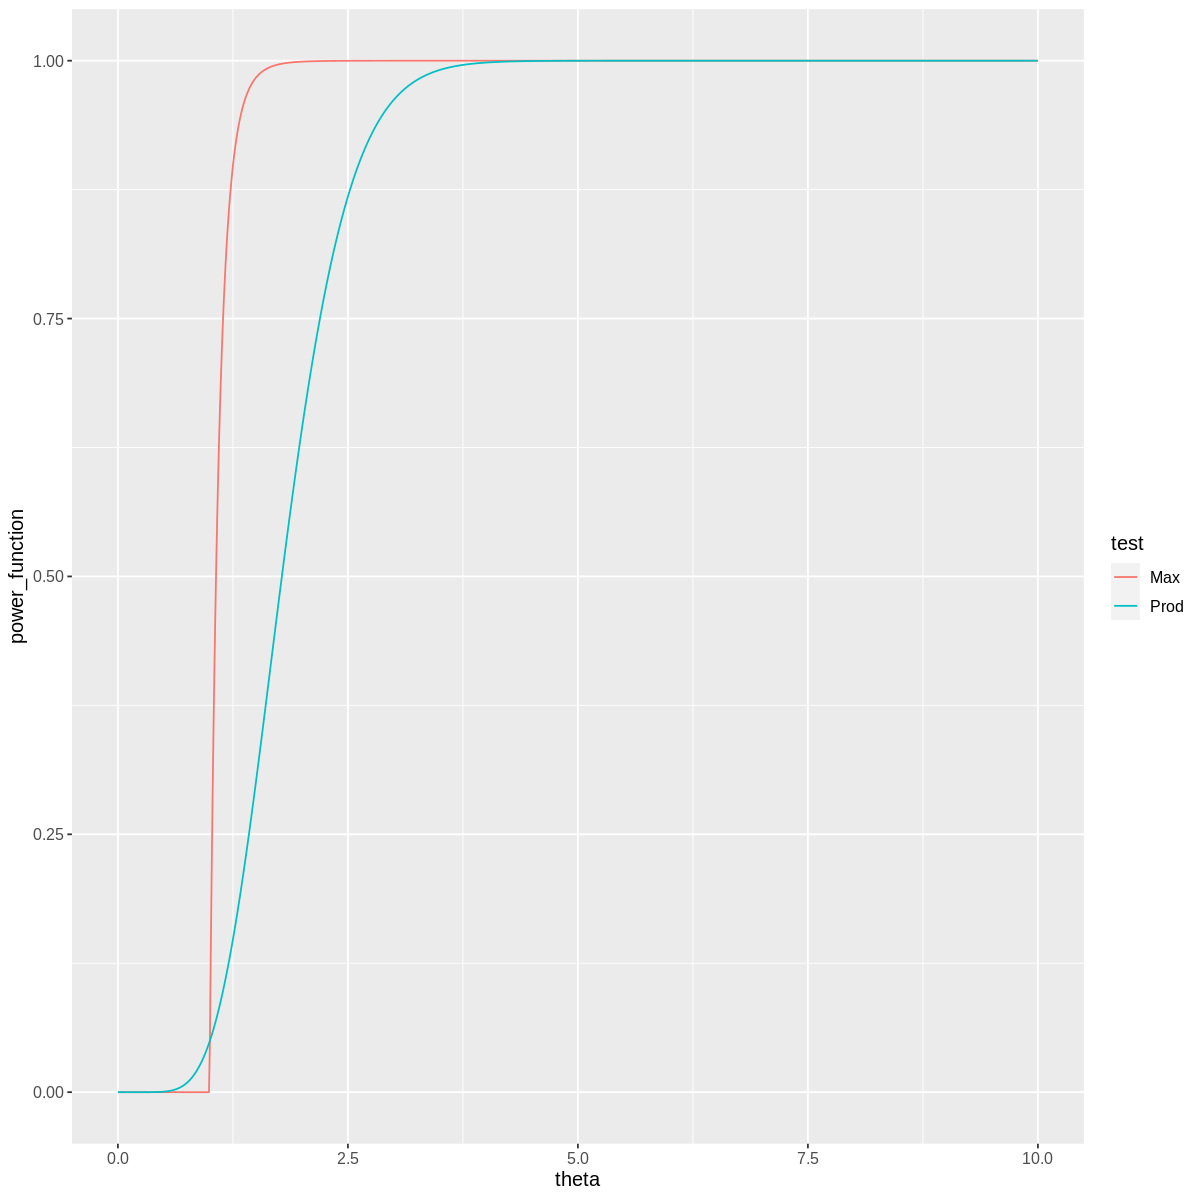

In [ ]:
theta<-seq(0,10, by = 0.01)
power_uniform_max=sapply(theta,power_function_max)
power_uniform_prod=sapply(theta,power_funcion_prod)

power_function=c(power_uniform_max,power_uniform_prod)
test=c(rep('Max',length(theta)),rep('Prod',length(theta)))

df=data.frame(theta=c(theta,theta),power_function=power_function,
              test=test)
options(repr.plot.width = 10, repr.plot.height =10)
ggplot(data=df,aes(x=theta,y=power_function,color=test))+geom_line()+
theme(text=element_text(size=12))